# 1. Import library

In [6]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Load data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((50692, 46), (12673, 46))

In [3]:
train_df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,num_emp_length,zip_code,revol_util_NA,pub_rec_bankruptcies_NA,num_emp_length_NA,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,Class
0,0.108280,0.0,0.325282,0.104632,0.006947,0.084381,0.092593,0.0,0.006235,0.465574,0.026316,0.00000,0.0,0.000000,0.508564,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.066242,0.0,0.337748,0.065071,0.004087,0.328574,0.166667,0.0,0.019136,0.662295,0.131579,0.06250,0.0,0.000000,0.923886,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.133758,0.0,0.259836,0.125383,0.007765,0.162476,0.222222,0.0,0.002703,0.185574,0.166667,0.00000,0.0,0.052632,0.046293,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.133758,0.0,0.427347,0.134311,0.023294,0.282762,0.370370,0.0,0.011418,0.534426,0.491228,0.28125,0.0,1.000000,0.235523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.222930,0.0,0.427347,0.222204,0.009399,0.059024,0.092593,0.0,0.006630,0.527869,0.052632,0.00000,0.0,0.263158,0.309882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [4]:
X_train = train_df.drop(['Class'],axis = 1)
y_train = train_df['Class']
X_test = test_df.drop(['Class'],axis = 1)
y_test = test_df['Class']

# 3. Logistic Regression

## 3.1. Introduction

### Sigmoid Function 

Mathematically

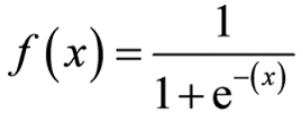

Where, f(x) = output between 0 and 1 (probability estimate)

Graphically,

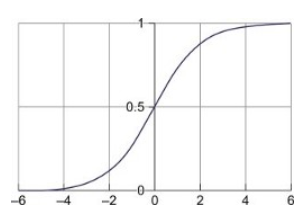

### Decision Boundary

To get a better sense of what a logistic regression hypothesis function computes, we need to know of a concept called ‘decision boundary’. The prediction function that we are using will return a probability score between 0 and 1. To map this score to a discrete class (positive/negative, true/false), we select a threshold value, say 0.5, above which we classify values into class 1 and below which the values will fall into class 2.

For instance, say the prediction function returns a value of 0.8, this would get classified as true/positive (as it is above the selected value of threshold). A value of 0.3, on the other hand, would get classified as false/negative. When dealing with multivariate logistic regression, we select the class with the highest predicted probability.

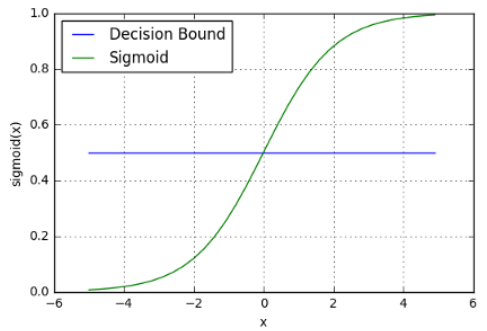

Source: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#sigmoid-activation

### Odds and log odds

Logistic regression work with odds rather than proportions. The odds are simply calculated as a ratio of proportions of two possible outcomes. Let p be the proportion of one outcome, then 1-p will be the proportion of the second outcome.

Mathematically,
Odds = p/1-p

The statistical model for logistic regression is
log (p/1-p) = β0 + β1x

### Multivariate Logistic Regression

## 3.2. Train-Test Split 

## 3.3. Model Building

## 3.4. Model Result

## 3.5. Model Interpretation

### Feature Importance

## 3.6. Model Evalutaion

The below metrics will be used to evaluation model

### Confusion Matrix

***The matrix consist of the following elements:***
+ True positive
+ True negative
+ False positive
+ False negative

***Some basic performance measures derived from the confusion matrix:***
+ Sensitivity
+ Specificity
+ Precision
+ Recall

### Receiver Operating Characteristic curve (ROC curve) and ROC-AUC


The ***Receiver Operating Characteristic curve*** is basically a plot between false positive rate and true positive rate for a number of threshold values lying between 0 and 1

### Precision-Recall Trade-off

When building a classification model, we need to consider both precision and recall. It is always possible to increase one value at the expense of the other (recall-focussed model/precision-focussed model). In choosing an optimal value for both these metrics, we should always keep in mind th type of problem we are aiming to solve

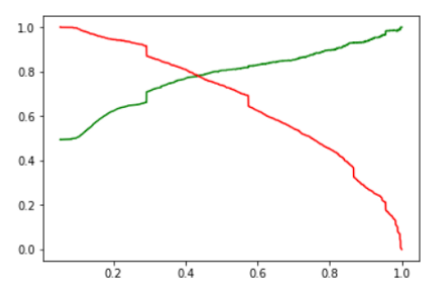

The chosen value of cut-off is 0.42

### 3.7. Tuning Model